# 3. Calling other programs

## C

Julia has a native interface for calling C functions via `ccall`:

In [67]:
ccall(("pow","libm"),Cdouble,(Cdouble,Cdouble),10.0,3.0)

1000.0

`ccall` takes the following arguments 
1. a (function, library) tuple
 * "libm" is the system math library
 * "pow" is the power function
2. the return type
 * Julia defines aliases for C types (in this case, `Cdouble` is an alias for `Float64`)
3. a tuple of the argument types
4. the argument values

This makes it very easy to interface with other software packages: this is the main interface to external libraries.

## R

RCall.jl provides an interface to R objects and functions. You will need R installed beforehand.

In [68]:
using RCall

The main interface is via a special R string literal (a string prefixed with `R`):

In [69]:
x = R"rnorm(10)"

RCall.RObject{RCall.RealSxp}
 [1] -0.12206867  0.02310409  0.68499119  0.45017797  2.59947015 -0.88626225
 [7] -0.75859540 -1.27795821  0.14667921  2.00639076


This returns an `RObject`, which is a Julia wrapper around an R object (in this case, a numeric vector).

We can convert this to a Julia object via `rcopy`:

In [70]:
rcopy(x)

10-element Array{Float64,1}:
 -0.122069 
  0.0231041
  0.684991 
  0.450178 
  2.59947  
 -0.886262 
 -0.758595 
 -1.27796  
  0.146679 
  2.00639  

Julia objects can be passed by prefixing them with `$` (whenever not valid R syntax, i.e. when indexing a data.frame)

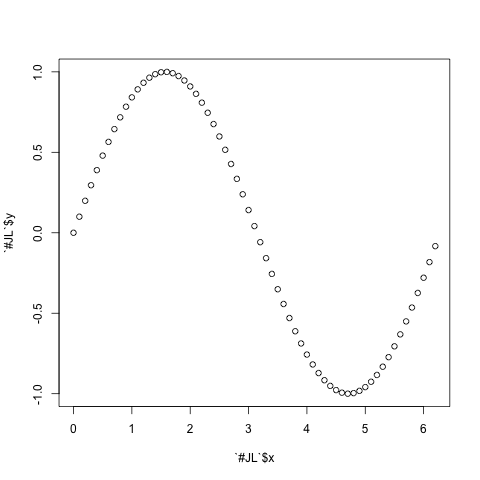

RCall.RObject{RCall.NilSxp}
NULL


In [71]:
x = 0:0.1:2pi
y = sin(x)

R"plot($x,$y)"

In both Julia and R functions, are objects. We can pass Julia functions to places which expect R functions:

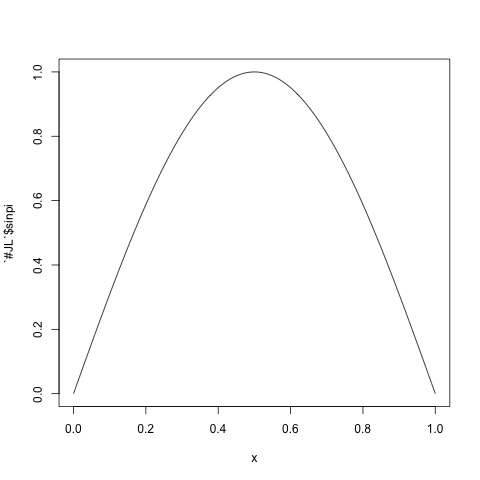

In [72]:
R"plot($sinpi)";

We can also go the other way. 

However this interoperativity can sometimes cause some very odd behaviour due to R's nonstandard evaluation:

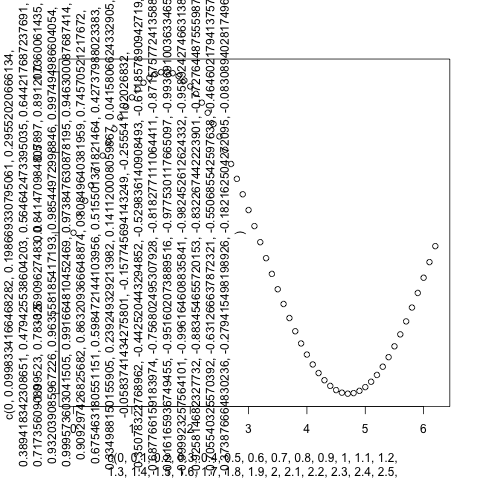

RCall.RObject{RCall.NilSxp}
NULL


In [73]:
rplot = R"plot"

rplot(x,y)

In [74]:
jfactorial(n) = n == 1 ? 1 : n*rcopy(rfactorial(n-1))
rfactorial = R"function(n) if (n == 1) 1L else n*$jfactorial(n-1)"

RCall.RObject{RCall.ClosSxp}
function (n) 
if (n == 1) 1L else n * `#JL`$jfactorial(n - 1)


In [76]:
jfactorial(10)

3.6288e6

Plays nicely with Julia DataFrames:

In [77]:
using RDatasets

In [12]:
iris = dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


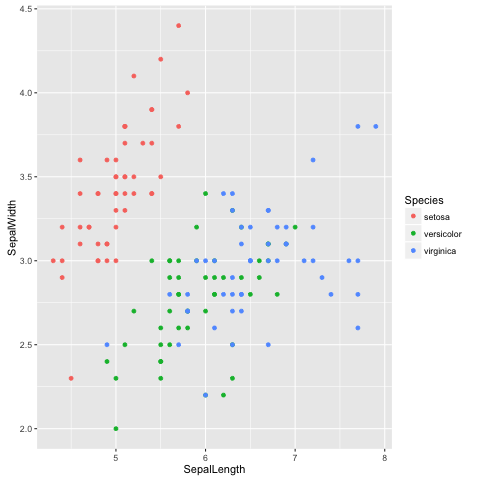

RCall.RObject{RCall.VecSxp}


In [17]:
R"library(ggplot2)"

# triple quotes are used to demarcate strings which span multiple lines
R"""ggplot($iris) + 
geom_point(aes(x = SepalLength, y = SepalWidth, color=Species))"""

## Other

There are similar interfaces to 
- Python (PyCall.jl)
- Matlab (MATLAB.jl)
- C++ (Cxx.jl)
- Java (JavaCall.jl)